In [1]:
import os, sys
dir2 = os.path.abspath('')
dir1 = os.path.dirname(dir2)
if not dir1 in sys.path: sys.path.append(dir1)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from SI2 import ANFIS, FuzzyInputVariable_List_Trapezoids
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4, 5x5). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, wystarczy 5x5, ważne żeby było widać jaka jest zależność.

## Data preparation

In [3]:
class Dataset:
    def __init__(self, X, Y, name) -> None:
        self.name = name
        self.__data = X
        self.__targets = Y
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = (None, None, None, None)
        
    def split(self, test_size =0.2, random_state =2137):
        self.__x_train, self.__x_test, self.__y_train, self.__y_test = train_test_split(
                                                                            self.__data, 
                                                                            self.__targets, 
                                                                            test_size=test_size, 
                                                                            random_state=random_state, stratify=self.__targets)
    
    @property
    def trainX(self): return self.__x_train.T
    
    @property
    def trainY(self): return self.__y_train
    
    @property
    def testX(self): return self.__x_test.T
    
    @property
    def testY(self): return self.__y_test

In [4]:
from typing import Tuple

def generate_data_for_multiply(start, end, test_size=0.2, random_state=2137):

    x: np.ndarray = np.arange(start, end+0.1, 0.1)
    tup: Tuple[np.ndarray, np.ndarray] = np.meshgrid(x, x)
    x, y = tup
    dataX = x.flatten()
    dataY = y.flatten()
    dataXY = np.column_stack((dataX,dataY))

    data_labels = np.round(dataX * dataY).astype(int)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(dataX, dataY, data_labels, c=data_labels, cmap='cividis')
    plt.show()
    data = Dataset(dataXY, data_labels, name=f"{end}x{end}")
    data.split(test_size, random_state)
    return data

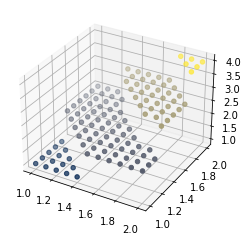

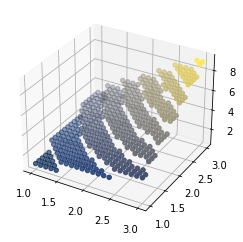

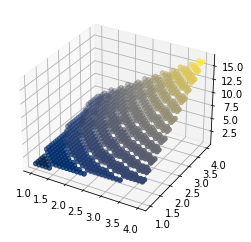

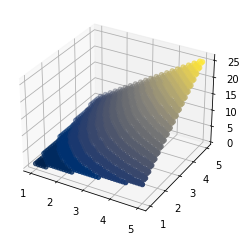

In [5]:
datasets = [generate_data_for_multiply(1, num) for num in range(2, 6)]

In [6]:
def create_vars(end):
    
    mf = [[num+1, 0.5, 0.5, 0.5] for num in range(end)]
    varX = FuzzyInputVariable_List_Trapezoids(mf, f"XAxis[{1},{end}]", [f"{i + 1}" for i in range(end)])
    varY = FuzzyInputVariable_List_Trapezoids(mf, f"YAxis[{1},{end}]", [f"{i + 1}" for i in range(end)])
    return [varX, varY]

variables = [create_vars(num) for num in range(2, 6)]

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.53720398 0.86829405 0.92288672]
 [0.75894656 0.1770148  0.51743879]
 [0.8129973  0.98484712 0.86373168]
 [0.4135123  0.47704482 0.44358118]]


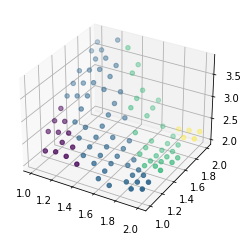

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.332422   0.05992041 0.72832213]
 [0.57360046 0.97322763 0.43878422]
 [0.24519835 0.3079494  0.16555241]
 [0.04608163 0.08603725 0.09394326]
 [0.35289837 0.6368799  0.2688941 ]
 [0.90704499 0.62333073 0.46138712]
 [0.99065602 0.09659509 0.16519951]
 [0.61136646 0.23716309 0.17971955]
 [0.46075372 0.46513691 0.91647176]]


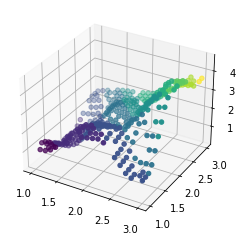

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[0.02976697 0.59657102 0.51723986]
 [0.74219199 0.14130269 0.39016748]
 [0.17196565 0.06689574 0.08032685]
 [0.66577182 0.33944524 0.62827518]
 [0.3532165  0.0919001  0.26100986]
 [0.98298433 0.09684875 0.48995416]
 [0.05031905 0.17884792 0.2767265 ]
 [0.02595889 0.51102599 0.41229959]
 [0.17514699 0.21691399 0.00167252]
 [0.69258552 0.42003856 0.43534253]
 [0.40796411 0.25375856 0.67804526]
 [0.23749028 0.77528138 0.01039036]
 [0.35968243 0.94095528 0.42462903]
 [0.61348797 0.02019387 0.5814139 ]
 [0.54215988 0.14515941 0.28371078]
 [0.49327104 0.73950837 0.32332113]]


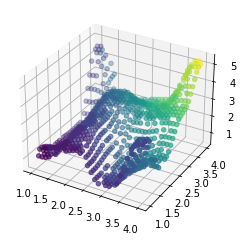

Parametry początkowe:
Przesłanki:  [[[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5], [5, 0.5, 0.5, 0.5]], [[1, 0.5, 0.5, 0.5], [2, 0.5, 0.5, 0.5], [3, 0.5, 0.5, 0.5], [4, 0.5, 0.5, 0.5], [5, 0.5, 0.5, 0.5]]] 
Konkluzje:  [[9.80038050e-02 4.67251507e-01 9.50530359e-01]
 [4.07712753e-01 1.75092795e-01 7.91400861e-01]
 [2.97454034e-01 7.40864669e-01 3.37378576e-01]
 [6.91991632e-01 5.43526165e-02 2.39410675e-01]
 [1.74900930e-01 7.14913274e-04 3.91278354e-01]
 [9.57589554e-01 1.28337243e-01 3.18734912e-01]
 [7.87724755e-01 5.83430934e-01 7.21709137e-01]
 [2.41804817e-01 2.00317448e-01 3.08630268e-01]
 [7.84172375e-01 8.95601901e-01 1.46093364e-01]
 [6.46122836e-01 4.69027491e-01 3.80899680e-01]
 [7.69766061e-01 2.66575012e-01 7.97074517e-01]
 [1.89884731e-01 5.67765236e-01 1.39704020e-01]
 [1.84827877e-01 8.73700394e-01 4.35242490e-01]
 [3.39351021e-01 7.75026189e-01 6.87327946e-02]
 [3.22398255e-01 9.43256953e-01 6.04401493e-01]
 [1.32218086e-01 9.51758376

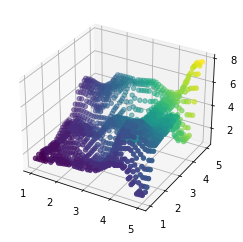

In [7]:
def create_anfis_instance(variables, dataset: Dataset):
    fis = ANFIS(variables, dataset.trainX, dataset.trainY)

    print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

    fis.show_results(color=dataset.trainY)
    return fis
anfises = {dataset.name:create_anfis_instance(vs, dataset) for vs, dataset in zip(variables, datasets)}

In [8]:
import concurrent.futures as cf
from SI2 import utils
from typing import Dict

losses = {}
trained_anfises: Dict[str, ANFIS] = {}
if __name__ == "__main__":
    with cf.ProcessPoolExecutor(max_workers=5) as executor:
        _futures = [executor.submit(utils.train_using_pso, key, anfis, 2000, **{"num_of_particles":200, "omega":0.8, "alpha":0.5, "beta":0.5, "sigma":1e-12, "theta":1e-12}) for key, anfis in anfises.items()]
        for future in cf.as_completed(_futures):
            key, optim_result, model = future.result()
            losses[key] = optim_result.fun
            trained_anfises[key] = model
            

In [9]:
print(losses)

{'2x2': 24.67183543458868, '3x3': 86.77844725677684, '4x4': 204.73766775426674, '5x5': 538.5451696902693}


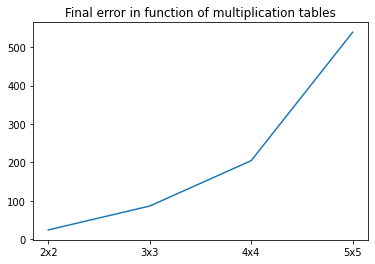

In [10]:
plt.plot(list(losses.values()))
plt.title("Final error in function of multiplication tables")
plt.xticks(np.arange(len(losses.values())), list(losses.keys()))
plt.show()

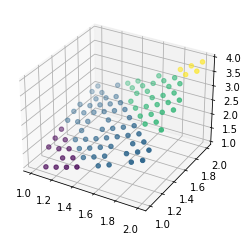

ACCURACY: 0.9583333333333334


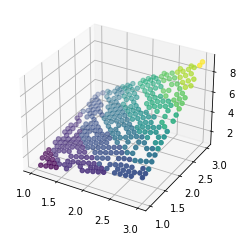

ACCURACY: 0.9403409090909091


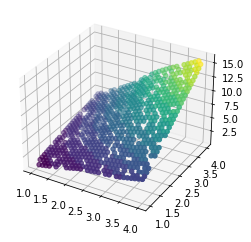

ACCURACY: 0.88671875


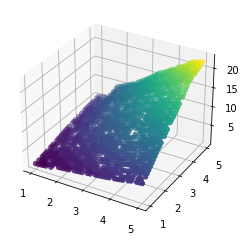

ACCURACY: 0.7462797619047619


In [11]:
for dataset, anfis in zip(datasets, list(trained_anfises.values())):
    anfis.expected_labels = dataset.trainY
    anfis.training_data = dataset.trainX
    anfis.show_results(dataset.trainY)
    y_pred = anfis.anfis_estimate_labels(anfis.premises, anfis.op, anfis.tsk)
    y_pred = list(map(round, y_pred.flatten()))
    print(f"ACCURACY: {accuracy_score(dataset.trainY, y_pred)}")

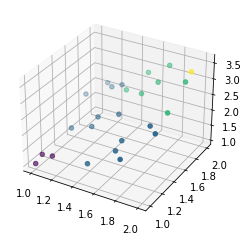

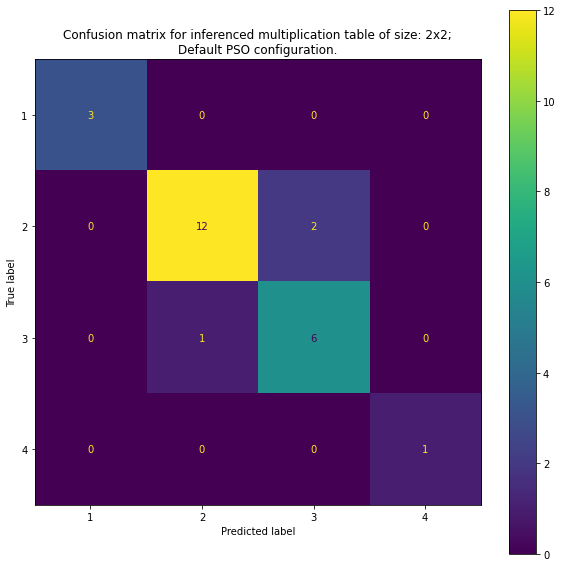

ACCURACY: 0.88


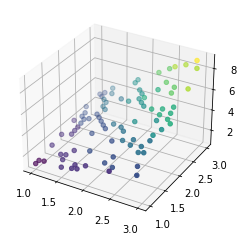

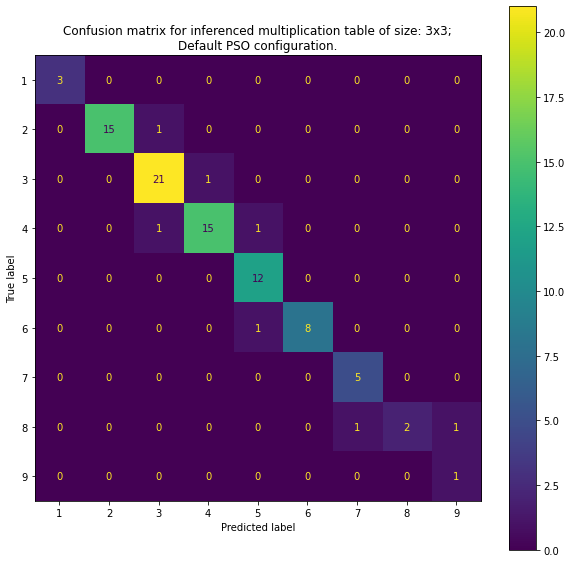

ACCURACY: 0.9213483146067416


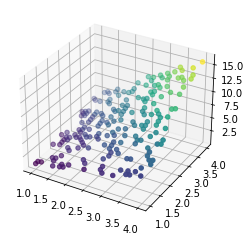

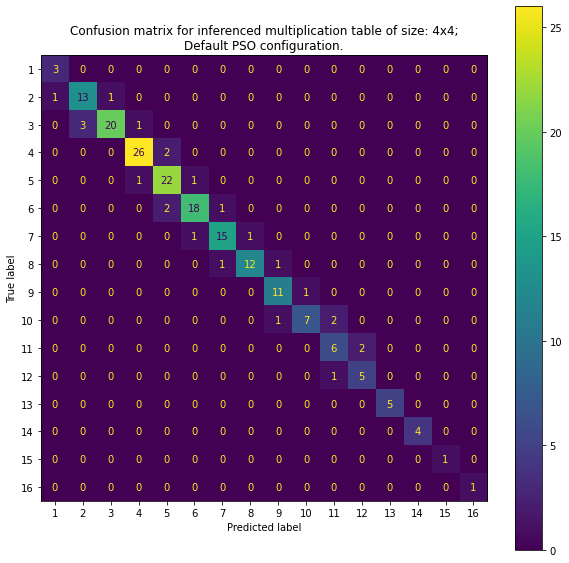

ACCURACY: 0.8756476683937824


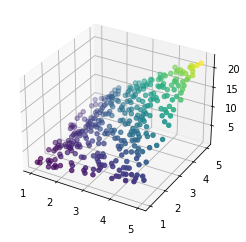

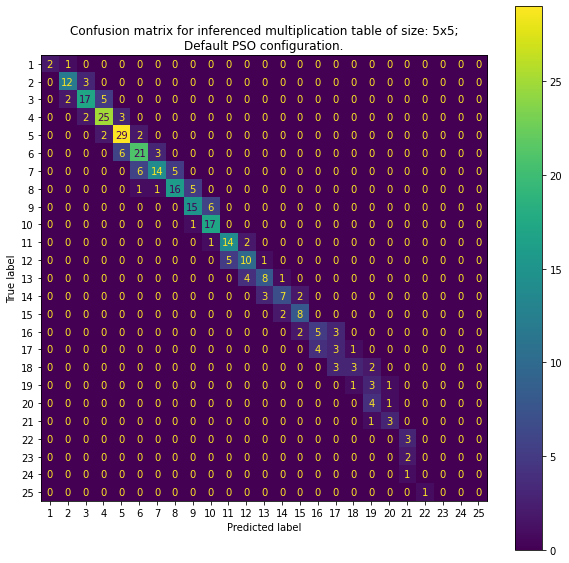

ACCURACY: 0.6824925816023739


In [12]:

for fis, key, dataset in zip(list(trained_anfises.values()), list(trained_anfises.keys()), datasets):
    fis.training_data = dataset.testX
    fis.expected_labels = dataset.testY
    fis.show_results(dataset.testY)  

    y_pred = fis.anfis_estimate_labels(fis.premises, fis.op, fis.tsk)
    y_pred = list(map(round, y_pred.flatten()))
    conf = confusion_matrix(dataset.testY, y_pred)
    disp = ConfusionMatrixDisplay(conf, display_labels=set(dataset.testY))
    fig, ax = plt.subplots(figsize=(10,10))
    disp.plot(ax=ax)
    plt.title(f"Confusion matrix for inferenced multiplication table of size: {key};\nDefault PSO configuration.")
    plt.show()
    print(f"ACCURACY: {accuracy_score(dataset.testY, y_pred)}")